In [1]:
print("hi")

hi


In [2]:
!pip list

Package                   Version
------------------------- ------------
altair                    5.1.2
asttokens                 2.4.1
attrs                     23.1.0
bleach                    6.1.0
blinker                   1.7.0
bokeh                     3.3.1
cachetools                5.3.2
certifi                   2023.7.22
charset-normalizer        3.3.2
click                     8.1.7
cloudpickle               3.0.0
colorcet                  3.0.1
comm                      0.2.0
contourpy                 1.2.0
cycler                    0.12.1
dask                      2023.11.0
datashader                0.16.0
debugpy                   1.8.0
decorator                 5.1.1
exceptiongroup            1.1.3
executing                 2.0.1
filelock                  3.9.0
fonttools                 4.44.3
fsspec                    2023.10.0
ghostipy                  0.2.2
gitdb                     4.0.11
GitPython                 3.1.40
holoviews                 1.18.1
hvplot      

In [1]:
import mne
import cv2
import meegkit.asr as asr

In [2]:
from torchvision.transforms import transforms

In [3]:
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [4]:
raw = mne.io.read_raw_edf('/home/dheeraj/Desktop/projects/scizo_frontend/h01.edf', preload=True)

Extracting EDF parameters from /home/dheeraj/Desktop/projects/scizo_frontend/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...


In [5]:
raw

<RawEDF | h01.edf, 19 x 231250 (925.0 s), ~33.5 MB, data loaded>

In [8]:
type(raw)

mne.io.edf.edf.RawEDF

In [11]:
len(raw._data)

19

In [12]:
raw._data.shape

(19, 231250)

In [15]:
raw.sfreq

AttributeError: 'RawEDF' object has no attribute 'sfreq'

In [18]:
raw.__dict__

{'_last_samps': array([231249]),
 '_first_samps': array([0]),
 'info': <Info | 8 non-empty values
  bads: []
  ch_names: Fp2, F8, T4, T6, O2, Fp1, F7, T3, T5, O1, F4, C4, P4, F3, C3, ...
  chs: 19 EEG
  custom_ref_applied: False
  highpass: 0.0 Hz
  lowpass: 125.0 Hz
  meas_date: 2003-06-23 16:14:37 UTC
  nchan: 19
  projs: []
  sfreq: 250.0 Hz
  subject_info: 1 item (dict)
 >,
 'buffer_size_sec': 1.0,
 '_cals': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 '_raw_extras': [{'events': [],
   'units': array([1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
          1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
          1.e-06, 1.e-06, 1.e-06]),
   'ch_names': ['Fp2',
    'F8',
    'T4',
    'T6',
    'O2',
    'Fp1',
    'F7',
    'T3',
    'T5',
    'O1',
    'F4',
    'C4',
    'P4',
    'F3',
    'C3',
    'P3',
    'Fz',
    'Cz',
    'Pz'],
   'ch_types': ['EEG',
    'EEG',
    'EEG',
    'EEG',
    '

In [8]:
from meegkit.asr import ASR
import matplotlib.pyplot as plt

In [9]:
raw.ch_names

['Fp2',
 'F8',
 'T4',
 'T6',
 'O2',
 'Fp1',
 'F7',
 'T3',
 'T5',
 'O1',
 'F4',
 'C4',
 'P4',
 'F3',
 'C3',
 'P3',
 'Fz',
 'Cz',
 'Pz']

In [10]:
sfreq= 250
train_idx = np.arange(0, 30 * sfreq, dtype=int)
asr_instance = asr.ASR(method="euclid")
asr_data_healthy, _ = asr_instance.fit(data_healthy[:, train_idx])

NameError: name 'data_healthy' is not defined

In [7]:
import os
import ghostipy
import numpy as np
from ghostipy.spectral.wavelets import MorseWavelet

In [50]:
def cal(path):
    sfreq=250
    if not os.path.exists('image_dir'):
        os.makedirs('image_dir')

    if not os.path.exists('image_dir/healthy'):
        os.makedirs('image_dir/healthy')

    if not os.path.exists('image_dir/schizophrenic'):
        os.makedirs('image_dir/schizophrenic')
    raw = mne.io.read_raw_edf(path,preload=True)
    #raw_files_healthy.append(raw)
    data_healthy = raw._data
    train_idx = np.arange(0, 30 * sfreq, dtype=int)
    asr_instance = asr.ASR(method="euclid")
    gmw = MorseWavelet(gamma=2, beta=1)

    asr_data_healthy, _ = asr_instance.fit(data_healthy[:, train_idx])

    channels = raw.ch_names
    dict_eeg = {channels[i] : asr_data_healthy[i] for i in range(19)}
    
    i = 0
    for channel_name, channel_data in dict_eeg.items():
        Wxh, *_  = ghostipy.spectral.cwt(channel_data, wavelet=gmw, voices_per_octave=10)
        # Plot the time frequency map
        plt.imshow(np.abs(Wxh), aspect='auto', cmap='turbo')
        file_name=files.replace('.edf','')
        
        image_filename = channel_name + '_' + file_name + str(i) + '.png'
        image_path = os.path.join(f"./image_dir_test/healthy/", image_filename)
        plt.savefig(image_path)
        i = i + 1

Extracting EDF parameters from /home/dheeraj/Desktop/projects/scizo_frontend/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...


NameError: name 'files' is not defined

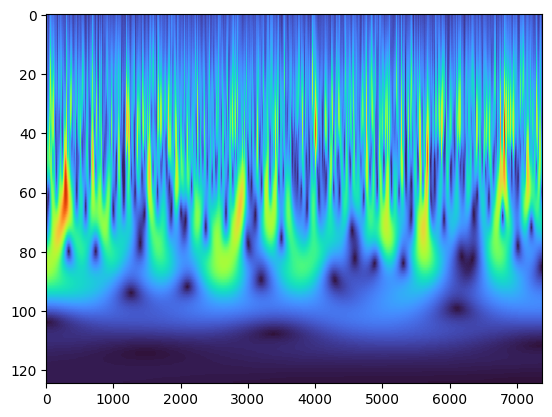

In [51]:
cal("/home/dheeraj/Desktop/projects/scizo_frontend/h01.edf")

In [34]:
from PIL import Image
image_path = "image_dir_no_axis/healthy/C3_h02 14.png"
single_img = Image.open(image_path)

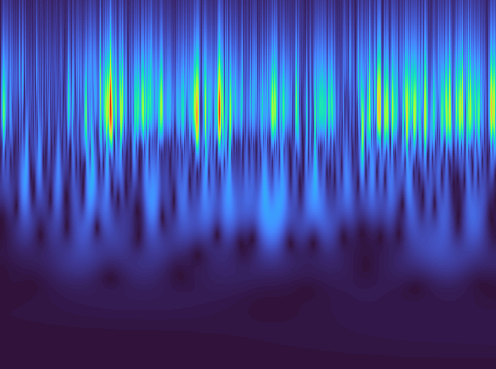

In [50]:
single_img

In [36]:
single_img=single_img.convert("RGB")

In [1]:
from torchvision.transforms import transforms
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), 
                         (0.5, 0.5, 0.5))
])

In [2]:
single_image = preprocess(single_img)


NameError: name 'single_img' is not defined

In [41]:
single_image.shape

torch.Size([3, 224, 224])

In [43]:
single_image.unsqueeze(0).shape

torch.Size([1, 3, 224, 224])

In [46]:

denorm_image = single_image.permute(1, 2, 0) * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))

In [47]:
denorm_image

tensor([[[0.2196, 0.1451, 0.4118],
         [0.2431, 0.2275, 0.5882],
         [0.2392, 0.2235, 0.5804],
         ...,
         [0.2510, 0.2706, 0.6627],
         [0.2549, 0.2902, 0.7059],
         [0.2588, 0.2863, 0.6980]],

        [[0.2196, 0.1529, 0.4196],
         [0.2471, 0.2353, 0.6000],
         [0.2431, 0.2314, 0.5961],
         ...,
         [0.2549, 0.2784, 0.6745],
         [0.2588, 0.3020, 0.7216],
         [0.2588, 0.2980, 0.7176]],

        [[0.2196, 0.1529, 0.4275],
         [0.2471, 0.2431, 0.6118],
         [0.2431, 0.2314, 0.6039],
         ...,
         [0.2549, 0.2863, 0.6902],
         [0.2588, 0.3059, 0.7294],
         [0.2588, 0.3020, 0.7216]],

        ...,

        [[0.1882, 0.0706, 0.2314],
         [0.1882, 0.0706, 0.2314],
         [0.1882, 0.0706, 0.2314],
         ...,
         [0.1882, 0.0706, 0.2314],
         [0.1882, 0.0706, 0.2314],
         [0.1882, 0.0706, 0.2314]],

        [[0.1882, 0.0706, 0.2314],
         [0.1882, 0.0706, 0.2314],
         [0.

In [44]:
from torchvision.datasets import ImageFolder
from torch.utils.data import  Dataset, DataLoader, random_split

In [45]:
dataset = ImageFolder("./image_dir_no_axis/", transform= preprocess)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [48]:
import torch
from torch import nn

In [49]:
class resnet(nn.Module):
    def __init__(self, num_classes=1):
        super().__init__()

        resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

        self.convolutional_layers = nn.Sequential(resnet.conv1,
                                   resnet.bn1,
                                   resnet.relu,
                                   resnet.maxpool,
                                   resnet.layer1,
                                   resnet.layer2,
                                   resnet.layer3,
                                   resnet.layer4)

        # # Add back the batch norm layer that we removed
        self.avgpool = resnet.avgpool # Global Average pooling layer

        # # # Custom fully connect layer
        self.fc = nn.Linear(in_features=resnet.fc.in_features, out_features=num_classes) 

        # gradient placeholder
        self.gradient = None

    # hook for the gradients
    def activations_hook(self, grad):
        self.gradient = grad
    
    def get_gradient(self):
        return self.gradient
    
    def get_activations(self, x):
        return self.convolutional_layers(x)
    
    def forward(self, images):        
        # Convolutional layers of resnet18
        x = self.convolutional_layers(images) 
               
        # # The layers after the Conv you used the hook on
        h = x.register_hook(self.activations_hook)
        
        # Global average pooling layer from resnet18
        x = self.avgpool(x)
        
        x = x.reshape(x.size(0), -1)
        logits = self.fc(x)
        
        output = F.sigmoid(logits)
        return output

In [2]:
import os
import mne
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import ghostipy
from ghostipy.spectral.wavelets import MorseWavelet

import torch
from torch import nn
import torchvision
import torch.nn.functional as F
from torchvision import datasets
from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split
#from torch.utils.tensorboard import SummaryWriter

from mne.time_frequency import morlet
from mne.time_frequency.tfr import cwt
from mne.time_frequency import tfr_morlet
from mne import create_info, EpochsArray
from mne.channels import make_dig_montage
from mne.preprocessing import ICA


In [4]:
def get_gradcam(model, image, prediction, size):
    prediction.backward()    
    gradients = model.get_gradient()
    pooled_gradients = torch.mean(gradients, dim = [0, 2, 3])
    activations = model.get_activations(image).detach() # A1, A2, ..., Ak
    
    for i in range(activations.shape[1]):
        activations[:, i, :, :] *= pooled_gradients[i]

    heatmap = torch.mean(activations, dim = 1).squeeze().cpu()
    heatmap = nn.ReLU()(heatmap)
    heatmap /= torch.max(heatmap)
    heatmap = cv2.resize(heatmap.numpy(), (size, size))
    
    return heatmap

In [5]:


def plot_heatmap(denorm_image, pred, heatmap):

    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20,20), ncols=3)

    classes = ['schizophrenic', 'healthy']
    ps = F.sigmoid(pred).cpu().detach().numpy()
    ax1.imshow(denorm_image)
    ax1.axis('off')

    ax2.barh(classes, [pred[0].item(), 1-pred[0].item()])
    ax2.set_aspect(0.1)
    ax2.set_yticks(classes)
    ax2.set_yticklabels(classes)
    ax2.set_title('Predicted Class')
    ax2.set_xlim(0, 1.1)

    ax3.imshow(denorm_image)
    ax3.imshow(heatmap, cmap='magma', alpha=0.7)
    ax3.axis('off')



In [6]:
from PIL import Image

# Open an image file
image_path = "./image_dir_no_axis/schizophrenic/Cz_s09 17.png"
img = Image.open(image_path)

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

img = img.convert('RGB')
img = preprocess(img)

denorm_image = img.permute(1, 2, 0) * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = resnet(num_classes=1).to(device)

model_num = 20
checkpoint_path = "."

# Load model weights
checkpoint = torch.load(f'{checkpoint_path}/resnet-finetune-adam-epoch_{model_num}.pth',map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])


img = img.unsqueeze(0).to(device)

model.eval()
pred = model(img)
rounded = torch.round(pred)
print(rounded.item())
print(pred)
heatmap = get_gradcam(model, img, pred, size=224)
plot_heatmap(denorm_image.cpu(), pred, heatmap)

cpu


NameError: name 'resnet' is not defined

In [9]:
!ls

app.py
back_app.py
dataverse_files.zip
edf_buffer
EEG_data
h01.edf
image_buffer
image_dir
image_dir-20231117T153935Z-001.zip
image_dir_no_axis
image_extract.py
next.py
__pycache__
resnet-finetune-adam-epoch_20
resnet-finetune-adam-epoch_20-20231122T170326Z-001.zip
resnet-finetune-adam-epoch_20.pth
scizo_frontend.code-workspace
test.ipynb
venv


In [8]:
dataset_test= ImageFolder("image_buffer", transform= preprocess)

FileNotFoundError: Couldn't find any class folder in image_buffer.

In [12]:
import os
from PIL import Image
from torchvision import transforms

# Define the transformation
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Specify the input folder
input_folder = "image_buffer"

# List all files in the input folder
image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

# Apply the transformation and convert images to RGB
for image_file in image_files:
    # Load the image
    input_path = os.path.join(input_folder, image_file)
    image = Image.open(input_path)

    # Convert RGBA to RGB if necessary
    if image.mode == 'RGBA':
        image = image.convert('RGB')

    # Apply the transformation
    transformed_image = preprocess(image)

    # Convert the transformed image to a PIL Image
    pil_transformed_image = transforms.ToPILImage()(transformed_image)

    # Save the transformed image, overwriting the original image
    pil_transformed_image.save(input_path)

print("Transformation and conversion to RGB completed.")


Transformation and conversion to RGB completed.


In [7]:
import os
from PIL import Image
from torchvision import transforms

# Define the transformation
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Specify the input folder
input_folder = "image_buffer"

# List all files in the input folder
image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

# Apply the transformation to each image and overwrite the original images
for image_file in image_files:
    # Load the image
    input_path = os.path.join(input_folder, image_file)
    image = Image.open(input_path)

    # Apply the transformation
    transformed_image = preprocess(image)

    # Convert the transformed image to a PIL Image
    pil_transformed_image = transforms.ToPILImage()(transformed_image)

    # Save the transformed image, overwriting the original image
    pil_transformed_image.save(input_path)

print("Transformation completed.")


RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

In [15]:
test_image = Image.open("image_buffer/C3.png")

In [20]:
test_image.size

(224, 224)

In [21]:


def get_gradcam(model, image, prediction, size):
    prediction.backward()    
    gradients = model.get_gradient()
    pooled_gradients = torch.mean(gradients, dim = [0, 2, 3])
    activations = model.get_activations(image).detach() # A1, A2, ..., Ak
    
    for i in range(activations.shape[1]):
        activations[:, i, :, :] *= pooled_gradients[i]

    heatmap = torch.mean(activations, dim = 1).squeeze().cpu()
    heatmap = nn.ReLU()(heatmap)
    heatmap /= torch.max(heatmap)
    heatmap = cv2.resize(heatmap.numpy(), (size, size))
    
    return heatmap



In [22]:
def plot_heatmap(denorm_image, pred, heatmap):

    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20,20), ncols=3)

    classes = ['schizophrenic', 'healthy']
    ps = F.sigmoid(pred).cpu().detach().numpy()
    ax1.imshow(denorm_image)
    ax1.axis('off')

    ax2.barh(classes, [pred[0].item(), 1-pred[0].item()])
    ax2.set_aspect(0.1)
    ax2.set_yticks(classes)
    ax2.set_yticklabels(classes)
    ax2.set_title('Predicted Class')
    ax2.set_xlim(0, 1.1)

    ax3.imshow(denorm_image)
    ax3.imshow(heatmap, cmap='magma', alpha=0.7)
    ax3.axis('off')

In [ ]:
model = resnet(num_classes=1).to(device)

model_num = 20
checkpoint_path = "./model_checkpoints/"

device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load model weights
checkpoint = torch.load(f'{checkpoint_path}/resnet-finetune-adam-epoch_{model_num}')
model.load_state_dict(checkpoint['model_state_dict'])

image, label = test_dataset[10]
denorm_image = image.permute(1, 2, 0) * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))

image = image.unsqueeze(0).to(device)

model.eval()
pred = model(image)
heatmap = get_gradcam(model, image, pred, size=224)
plot_heatmap(denorm_image, pred, heatmap)

In [30]:
class resnet(nn.Module):
    def __init__(self, num_classes=1):
        super().__init__()

        resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

        self.convolutional_layers = nn.Sequential(resnet.conv1,
                                   resnet.bn1,
                                   resnet.relu,
                                   resnet.maxpool,
                                   resnet.layer1,
                                   resnet.layer2,
                                   resnet.layer3,
                                   resnet.layer4)

        # # Add back the batch norm layer that we removed
        self.avgpool = resnet.avgpool # Global Average pooling layer

        # # # Custom fully connect layer
        self.fc = nn.Linear(in_features=resnet.fc.in_features, out_features=num_classes) 

        # gradient placeholder
        self.gradient = None

    # hook for the gradients
    def activations_hook(self, grad):
        self.gradient = grad
    
    def get_gradient(self):
        return self.gradient
    
    def get_activations(self, x):
        return self.convolutional_layers(x)
    
    def forward(self, images):        
        # Convolutional layers of resnet18
        x = self.convolutional_layers(images) 
               
        # # The layers after the Conv you used the hook on
        h = x.register_hook(self.activations_hook)
        
        # Global average pooling layer from resnet18
        x = self.avgpool(x)
        
        x = x.reshape(x.size(0), -1)
        logits = self.fc(x)
        
        output = F.sigmoid(logits)
        return output

In [33]:
model = resnet(num_classes=1).to(device)
model_num = 20
checkpoint_path = "."
checkpoint = torch.load(f'{checkpoint_path}/resnet-finetune-adam-epoch_{model_num}.pth', map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])


Using cache found in /home/dheeraj/.cache/torch/hub/pytorch_vision_v0.10.0


<All keys matched successfully>

In [24]:
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [27]:
device.type

'cpu'

In [41]:
image_path = "image_buffer/Cz.png"
from PIL import Image
img = Image.open(image_path)

In [36]:
img.size

(224, 224)

In [40]:
img.convert('RGB')

AttributeError: 'Tensor' object has no attribute 'convert'

In [42]:
img = preprocess(img)

In [44]:
denorm_image= img.permute(1, 2, 0) * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))

In [45]:
denorm_image

tensor([[[0.8627, 0.5176, 0.4745],
         [0.8784, 0.5490, 0.5529],
         [0.8941, 0.6118, 0.6941],
         ...,
         [0.9098, 0.6588, 0.8196],
         [0.8471, 0.4980, 0.4275],
         [0.8471, 0.4980, 0.4275]],

        [[0.8627, 0.5176, 0.4745],
         [0.8784, 0.5490, 0.5529],
         [0.8941, 0.6275, 0.7255],
         ...,
         [0.9255, 0.6902, 0.8510],
         [0.8471, 0.4980, 0.4431],
         [0.8471, 0.4980, 0.4275]],

        [[0.8627, 0.5333, 0.5059],
         [0.8784, 0.5490, 0.5686],
         [0.8941, 0.6275, 0.7412],
         ...,
         [0.9255, 0.6902, 0.8667],
         [0.8627, 0.5176, 0.4745],
         [0.8471, 0.4980, 0.4275]],

        ...,

        [[0.7686, 0.2941, 0.9412],
         [0.7686, 0.2941, 0.9412],
         [0.7686, 0.2941, 0.9412],
         ...,
         [0.7686, 0.2941, 0.9412],
         [0.7686, 0.2941, 0.9412],
         [0.7686, 0.2941, 0.9412]],

        [[0.7686, 0.2941, 0.9412],
         [0.7686, 0.2941, 0.9412],
         [0.

In [46]:
img = img.unsqueeze(0).to(device)

In [47]:
model.eval()

resnet(
  (convolutional_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [48]:
pred = model(img)

In [49]:
pred

tensor([[0.9951]], grad_fn=<SigmoidBackward0>)

In [8]:
from PIL import Image
img = Image.open("image_buffer/C4.png")
img.size, img.mode

((496, 369), 'RGBA')

In [3]:
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [4]:

img = img.convert('RGB')
img = preprocess(img)


In [5]:
denorm_image = img.permute(1, 2, 0) * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))


In [6]:
denorm_image

tensor([[[0.2588, 0.3490, 0.7725],
         [0.2706, 0.3882, 0.8510],
         [0.2706, 0.3686, 0.8275],
         ...,
         [0.2745, 0.4353, 0.9020],
         [0.2667, 0.3373, 0.7765],
         [0.2627, 0.3216, 0.7569]],

        [[0.2588, 0.3608, 0.7843],
         [0.2745, 0.4000, 0.8627],
         [0.2706, 0.3804, 0.8392],
         ...,
         [0.2745, 0.4471, 0.9098],
         [0.2667, 0.3490, 0.7922],
         [0.2667, 0.3294, 0.7647]],

        [[0.2627, 0.3686, 0.7961],
         [0.2745, 0.4078, 0.8745],
         [0.2706, 0.3843, 0.8471],
         ...,
         [0.2745, 0.4471, 0.9137],
         [0.2667, 0.3529, 0.8000],
         [0.2667, 0.3373, 0.7765]],

        ...,

        [[0.1961, 0.0941, 0.2902],
         [0.1961, 0.0941, 0.2902],
         [0.1961, 0.0941, 0.2902],
         ...,
         [0.1961, 0.0902, 0.2784],
         [0.1961, 0.0902, 0.2784],
         [0.1961, 0.0902, 0.2784]],

        [[0.1961, 0.0941, 0.2902],
         [0.1961, 0.0941, 0.2902],
         [0.